In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('concrete.csv')

In [3]:
#Loading Data
data.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Type,Concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,B,79.986111
1,540.0,0.0,NaN,162.0,2.5,1055.0,676.0,28,A,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,A,40.269535
3,332.5,142.5,NaN,228.0,0.0,932.0,594.0,365,A,41.052780
4,198.6,132.4,NaN,192.0,0.0,978.4,825.5,360,A,44.296075


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1021 non-null   float64
 1   Blast_Furnace_Slag             1030 non-null   float64
 2   Fly_Ash                        1019 non-null   float64
 3   Water                          1017 non-null   float64
 4   Superplasticizer               1022 non-null   float64
 5   Coarse_Aggregate               1030 non-null   float64
 6   Fine_Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Type                           1024 non-null   object 
 9   Concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 80.6+ KB


In [5]:
data.describe()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
count,1021.000000,1030.000000,1019.000000,1017.000000,1022.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,280.746915,73.895485,54.772080,181.425615,6.251668,972.918592,773.578883,45.662136,35.817836
std,104.740782,86.279104,64.091594,21.088357,5.971460,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.000000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.800000,22.000000,0.000000,185.000000,6.470000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.265000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


# Imputing missing values with mean and median

In [6]:
updated_data = data.copy()

In [7]:
updated_data['Cement'] = updated_data['Cement'].fillna(updated_data['Cement'].mean())

In [8]:
updated_data['Water'] = updated_data['Water'].fillna(updated_data['Water'].mean())

In [9]:
updated_data['Superplasticizer'] = updated_data['Superplasticizer'].fillna(updated_data['Superplasticizer'].median())

In [10]:
updated_data['Fly_Ash'] = updated_data['Fly_Ash'].fillna(updated_data['Fly_Ash'].mean())

# Imputing missing values for categorical variables

<AxesSubplot:>

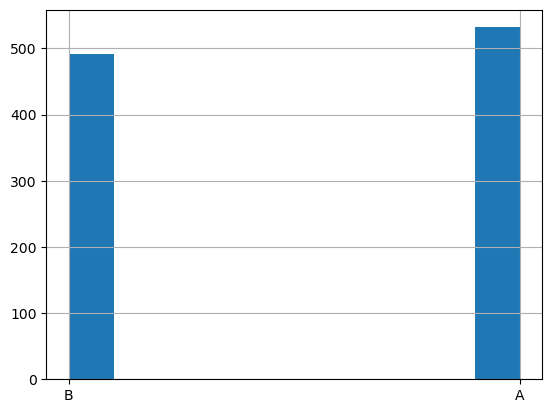

In [11]:
updated_data['Type'].hist()

In [12]:
updated_data['Type'].mode()[0]

'A'

In [13]:
updated_data['Type'] = updated_data['Type'].fillna(updated_data['Type'].mode()[0])

In [15]:
updated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast_Furnace_Slag             1030 non-null   float64
 2   Fly_Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse_Aggregate               1030 non-null   float64
 6   Fine_Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Type                           1030 non-null   object 
 9   Concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 80.6+ KB


# Encode Categorical Variables Using OneHotEncoder Method

In [16]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories='auto',drop=None,sparse=False)

transformed = ohe.fit_transform(updated_data['Type'].to_numpy().reshape(-1,1))
ohe_data = pd.DataFrame(transformed, columns = ohe.get_feature_names())
updated_data = pd.concat([updated_data, ohe_data], axis=1).drop(['Type'],axis=1)

C:\Users\VICTUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [17]:
updated_data

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength,x0_A,x0_B
0,540.0,0.0,0.00000,162.0,2.5,1040.0,676.0,28,79.986111,0.0,1.0
1,540.0,0.0,54.77208,162.0,2.5,1055.0,676.0,28,61.887366,1.0,0.0
2,332.5,142.5,0.00000,228.0,0.0,932.0,594.0,270,40.269535,1.0,0.0
3,332.5,142.5,54.77208,228.0,0.0,932.0,594.0,365,41.052780,1.0,0.0
4,198.6,132.4,54.77208,192.0,0.0,978.4,825.5,360,44.296075,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.30000,179.6,8.9,870.1,768.3,28,44.284354,1.0,0.0
1026,322.2,0.0,115.60000,196.0,10.4,817.9,813.4,28,31.178794,0.0,1.0
1027,148.5,139.4,108.60000,192.7,6.1,892.4,780.0,28,23.696601,1.0,0.0
1028,159.1,186.7,0.00000,175.6,11.3,989.6,788.9,28,32.768036,0.0,1.0


# Detect outliers

In [18]:
updated_data.columns

Index(['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer',
       'Coarse_Aggregate', 'Fine_Aggregate', 'Age',
       'Concrete_compressive_strength', 'x0_A', 'x0_B'],
      dtype='object')

<AxesSubplot:ylabel='Cement'>

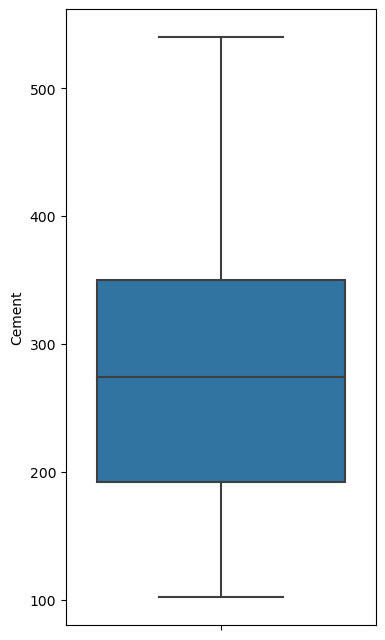

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (4,8))
sns.boxplot(y = updated_data.Cement)

<AxesSubplot:ylabel='Blast_Furnace_Slag'>

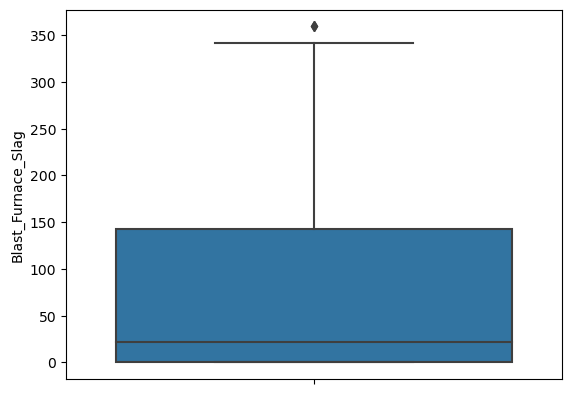

In [20]:
sns.boxplot(y = updated_data.Blast_Furnace_Slag)

<AxesSubplot:ylabel='Fly_Ash'>

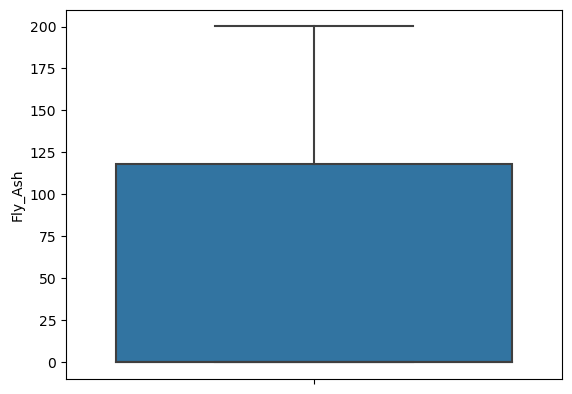

In [21]:
sns.boxplot(y = updated_data.Fly_Ash)

<AxesSubplot:ylabel='Water'>

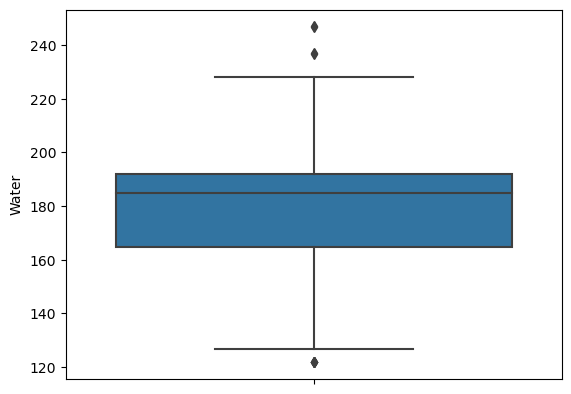

In [22]:
sns.boxplot(y = updated_data.Water)

<AxesSubplot:ylabel='Superplasticizer'>

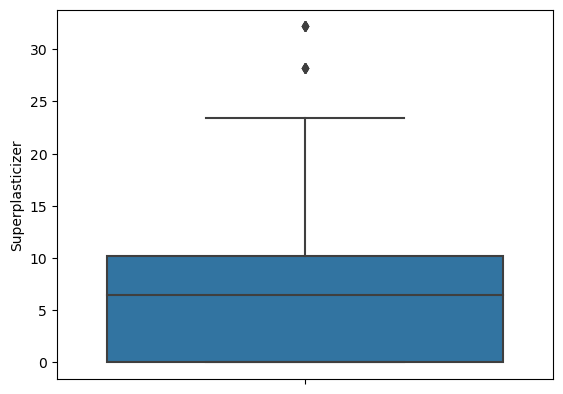

In [23]:
sns.boxplot(y = updated_data.Superplasticizer)

<AxesSubplot:ylabel='Coarse_Aggregate'>

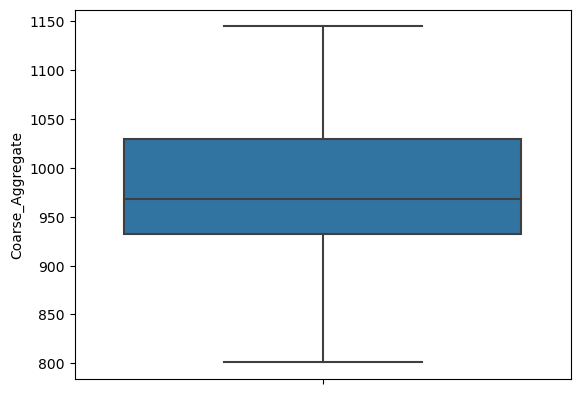

In [24]:
sns.boxplot(y = updated_data.Coarse_Aggregate)

<AxesSubplot:ylabel='Fine_Aggregate'>

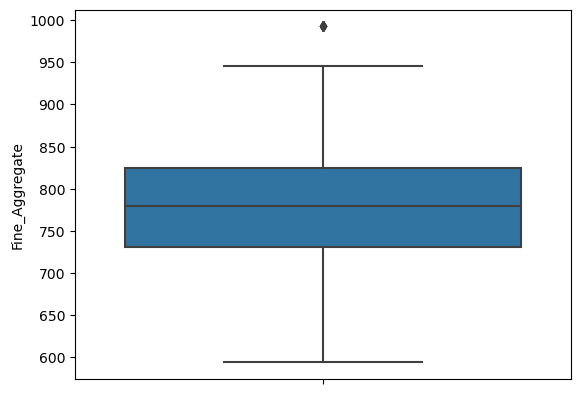

In [25]:
sns.boxplot(y = updated_data.Fine_Aggregate)

# Eliminate Outliers



IQR Method

In [26]:
def out_iqr(data,column):
    global lower, upper
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is', iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    data1 = data[data[column] > upper]
    data2 = data[data[column] < lower]
    return print('Total number of outliers are', data1.shape[0] + data2.shape[0])

In [27]:
updated_old = updated_data.copy()
updated_data2 = updated_data.copy()
for i in updated_data.columns:
    print('\n'+i)
    out_iqr(updated_data,i)
    updated_data2 = updated_data2[(updated_data2[i] < upper) & (updated_data2[i] > lower)]


Cement
The IQR is 157.625
The lower bound value is -44.0625
The upper bound value is 586.4375
Total number of outliers are 0

Blast_Furnace_Slag
The IQR is 142.95
The lower bound value is -214.42499999999998
The upper bound value is 357.375
Total number of outliers are 2

Fly_Ash
The IQR is 118.27
The lower bound value is -177.405
The upper bound value is 295.675
Total number of outliers are 0

Water
The IQR is 27.099999999999994
The lower bound value is 124.25000000000001
The upper bound value is 232.64999999999998
Total number of outliers are 9

Superplasticizer
The IQR is 10.16
The lower bound value is -15.24
The upper bound value is 25.4
Total number of outliers are 10

Coarse_Aggregate
The IQR is 97.40000000000009
The lower bound value is 785.8999999999999
The upper bound value is 1175.5000000000002
Total number of outliers are 0

Fine_Aggregate
The IQR is 93.04999999999995
The lower bound value is 591.3750000000001
The upper bound value is 963.5749999999999
Total number of outli

In [28]:
updated_old.shape


(1030, 11)

In [29]:
updated_data2.shape

(941, 11)

# Standard Deviation Method

In [32]:
def out_std(data, column):
    global lower, upper
    #calculate the mean and standard deviation
    data_mean, data_std = data[column].mean(), data[column].std()
    #calculate the cutoff value
    cut_off = data_std*3
    #calculate the lower and upper bound value
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    #Calculate the number of records below and above lower and above bound value respectively
    data1 = data[data[column] > upper]
    data2 = data[data[column] < lower]
    return print('Total number of outliers are', data1.shape[0] + data2.shape[0])

In [33]:
updated_data3 = updated_data.copy()
for i in updated_data.columns:
    print("\n"+i)
    out_std(updated_data, i)
    updated_data3 = updated_data3[(updated_data3[i] < upper) & (updated_data3[i] > lower)]


Cement
The lower bound value is -32.09826321468569
The upper bound value is 593.5920927935297
Total number of outliers are 0

Blast_Furnace_Slag
The lower bound value is -184.94182549261313
The upper bound value is 332.7327963663996
Total number of outliers are 4

Fly_Ash
The lower bound value is -136.4722328655336
The upper bound value is 246.01639380763373
Total number of outliers are 0

Water
The lower bound value is 118.56144748861495
The upper bound value is 244.2897816165962
Total number of outliers are 2

Superplasticizer
The lower bound value is -11.591334767283769
The upper bound value is 24.098062922623576
Total number of outliers are 10

Coarse_Aggregate
The lower bound value is 739.6571379576412
The upper bound value is 1206.1800465083775
Total number of outliers are 0

Fine_Aggregate
The lower bound value is 533.0526012980729
The upper bound value is 1014.1051656922157
Total number of outliers are 0

Age
The lower bound value is -143.84759882076938
The upper bound value i

In [34]:
updated_old.shape

(1030, 11)

In [35]:
updated_data3.shape

(981, 11)

# Dividing Dataset for x and y values

In [36]:
x = updated_data3.drop(['Concrete_compressive_strength'],axis=1)
y = updated_data3['Concrete_compressive_strength']

In [37]:
x

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,x0_A,x0_B
0,540.0,0.0,0.00000,162.0,2.5,1040.0,676.0,28,0.0,1.0
1,540.0,0.0,54.77208,162.0,2.5,1055.0,676.0,28,1.0,0.0
5,266.0,114.0,54.77208,228.0,0.0,932.0,670.0,90,1.0,0.0
7,380.0,95.0,54.77208,228.0,0.0,932.0,594.0,28,0.0,1.0
8,266.0,114.0,54.77208,228.0,0.0,932.0,670.0,28,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.30000,179.6,8.9,870.1,768.3,28,1.0,0.0
1026,322.2,0.0,115.60000,196.0,10.4,817.9,813.4,28,0.0,1.0
1027,148.5,139.4,108.60000,192.7,6.1,892.4,780.0,28,1.0,0.0
1028,159.1,186.7,0.00000,175.6,11.3,989.6,788.9,28,0.0,1.0


In [38]:
y

0       79.986111
1       61.887366
5       47.029847
7       36.447770
8       45.854291
          ...    
1025    44.284354
1026    31.178794
1027    23.696601
1028    32.768036
1029    32.401235
Name: Concrete_compressive_strength, Length: 981, dtype: float64

# Normalize Data

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
updated_data3[['Cement','Blast_Furnace_Slag','Fly_Ash','Water','Superplasticizer','Coarse_Aggregate','Fine_Aggregate','Age','x0_A','x0_B']] = scaler.fit_transform(x)

In [40]:
updated_data3

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength,x0_A,x0_B
0,2.566139,-0.858513,-0.888430,-0.940842,-0.681721,0.839767,-1.288495,-0.229254,79.986111,-1.034224,1.034224
1,2.566139,-0.858513,-0.035974,-0.940842,-0.681721,1.032755,-1.288495,-0.229254,61.887366,0.966908,-0.966908
5,-0.109575,0.480237,-0.035974,2.377412,-1.139148,-0.549743,-1.365803,1.453139,47.029847,0.966908,-0.966908
7,1.003678,0.257112,-0.035974,2.377412,-1.139148,-0.549743,-2.345037,-0.229254,36.447770,-1.034224,1.034224
8,-0.109575,0.480237,-0.035974,2.377412,-1.139148,-0.549743,-1.365803,-0.229254,45.854291,-1.034224,1.034224
...,...,...,...,...,...,...,...,...,...,...,...
1025,-0.008015,0.503724,0.516972,-0.055975,0.489292,-1.346138,-0.099241,-0.229254,44.284354,0.966908,-0.966908
1026,0.439240,-0.858513,0.910734,0.768561,0.763748,-2.017735,0.481857,-0.229254,31.178794,-1.034224,1.034224
1027,-1.257006,0.778520,0.801788,0.602649,-0.023026,-1.059230,0.051509,-0.229254,23.696601,0.966908,-0.966908
1028,-1.153493,1.333983,-0.888430,-0.257081,0.928422,0.191329,0.166183,-0.229254,32.768036,-1.034224,1.034224


# Feature Selection


# Correlation Matrix

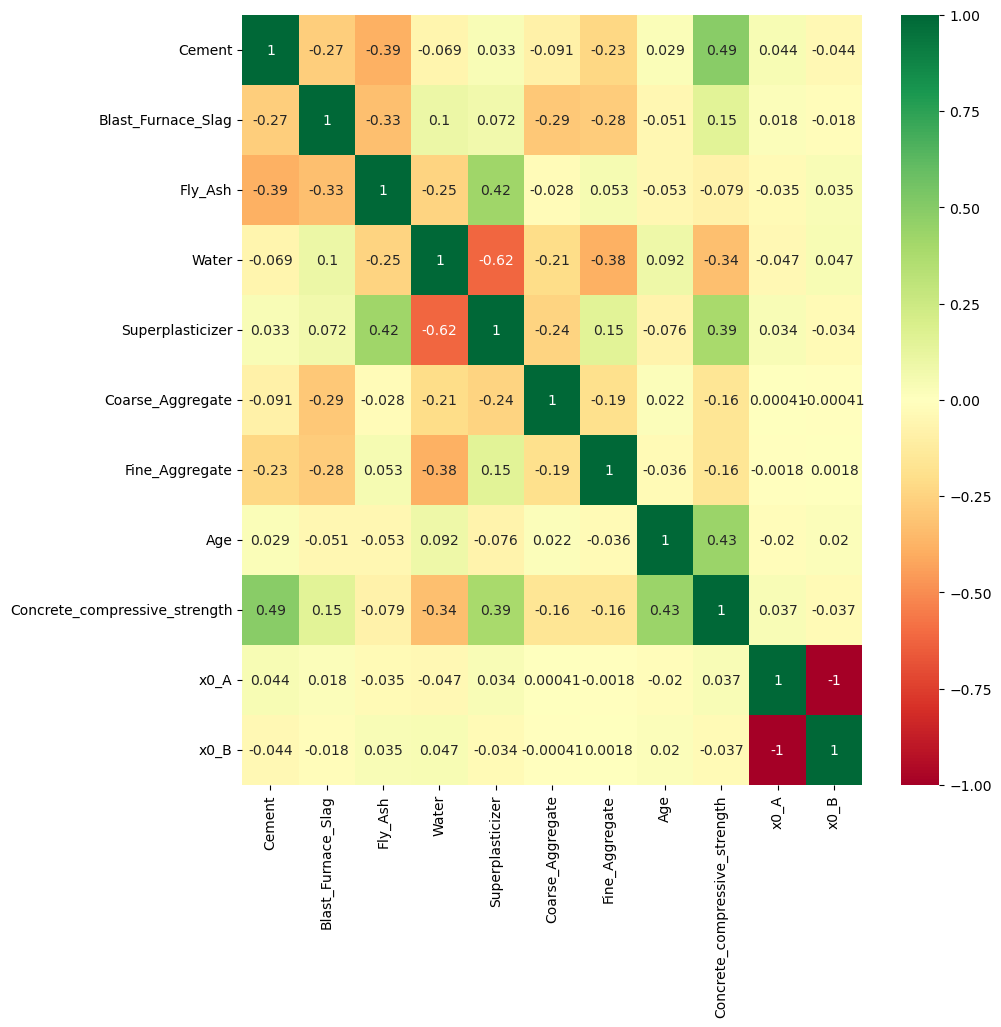

In [41]:
#get correlations of each features in dataset
corrmat = updated_data3.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (10,10))
#plot heat map
g = sns.heatmap(updated_data3[top_corr_features].corr(),annot=True, cmap='RdYlGn')

# Select K-Best Features

In [42]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [43]:
bestfeatures = SelectKBest(score_func = f_regression, k=3)
new_data = bestfeatures.fit_transform(x,y)
new_data

array([[540. ,   2.5,  28. ],
       [540. ,   2.5,  28. ],
       [266. ,   0. ,  90. ],
       ...,
       [148.5,   6.1,  28. ],
       [159.1,  11.3,  28. ],
       [260.9,   8.6,  28. ]])

In [44]:
new_data = pd.DataFrame(new_data, columns = x.columns[bestfeatures.get_support()])
new_data.head()

,Cement,Superplasticizer,Age
0,540.0,2.5,28.0
1,540.0,2.5,28.0
2,266.0,0.0,90.0
3,380.0,0.0,28.0
4,266.0,0.0,28.0


# Linear Regression

In [45]:
x_new = updated_data3[['Cement','Superplasticizer','Age']]

In [46]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_new, y)

LinearRegression()

In [47]:
lr.intercept_

35.29410996981244

In [48]:
lr.coef_

array([7.68261321, 6.80053865, 7.53507043])

In [49]:
prediction = lr.predict(x_new)

In [50]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, prediction)

118.69788178310095